# Projet Data Mining -DA 2021 
## Réalisé par : Aymane HMIDICH & Mehdi SLAOUI 
### Filière : DATA ENGINEER 


<h1>table de matière </h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#I. Dataset:">I. Dataset:</a> </li>
        <li><a href="#II. Data preprocessing">II. Data preprocessing</a> </li>
        <li><a href="#III. Exploratory data analysis">III. Exploratory data analysis</a></li>
        <li><a href="#IV. Modeling">IV. Modeling</a></li>
    </ol>
</div>
<br>
<hr>

<div id="I. Dataset:">
    <h2>Préparer les données</h2> 
</div>

This data describes two datasets with hotel demand data. One of the hotels (H1) is a resort hotel and the other is
a city hotel (H2). Both datasets share the same structure, with 31 variables describing the 40,060
observations of H1 and 79,330 observations of H2. Each observation represents a hotel booking.  Since this is hotel real data, 
all data elements pertaining hotel or costumer identification were deleted. 

In [7]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
import missingno as msno 
import datetime as dt
np.random.seed (42) 

- importing our csv file into a pandas dataframe

In [8]:
hotels=pd.read_csv('hotelsBookingDemand.csv')

In [9]:
hotels.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [10]:
hotels.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [11]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

- 1. Verify missing values 

In [12]:
hotels.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

- we have some missing values that we need to take care of

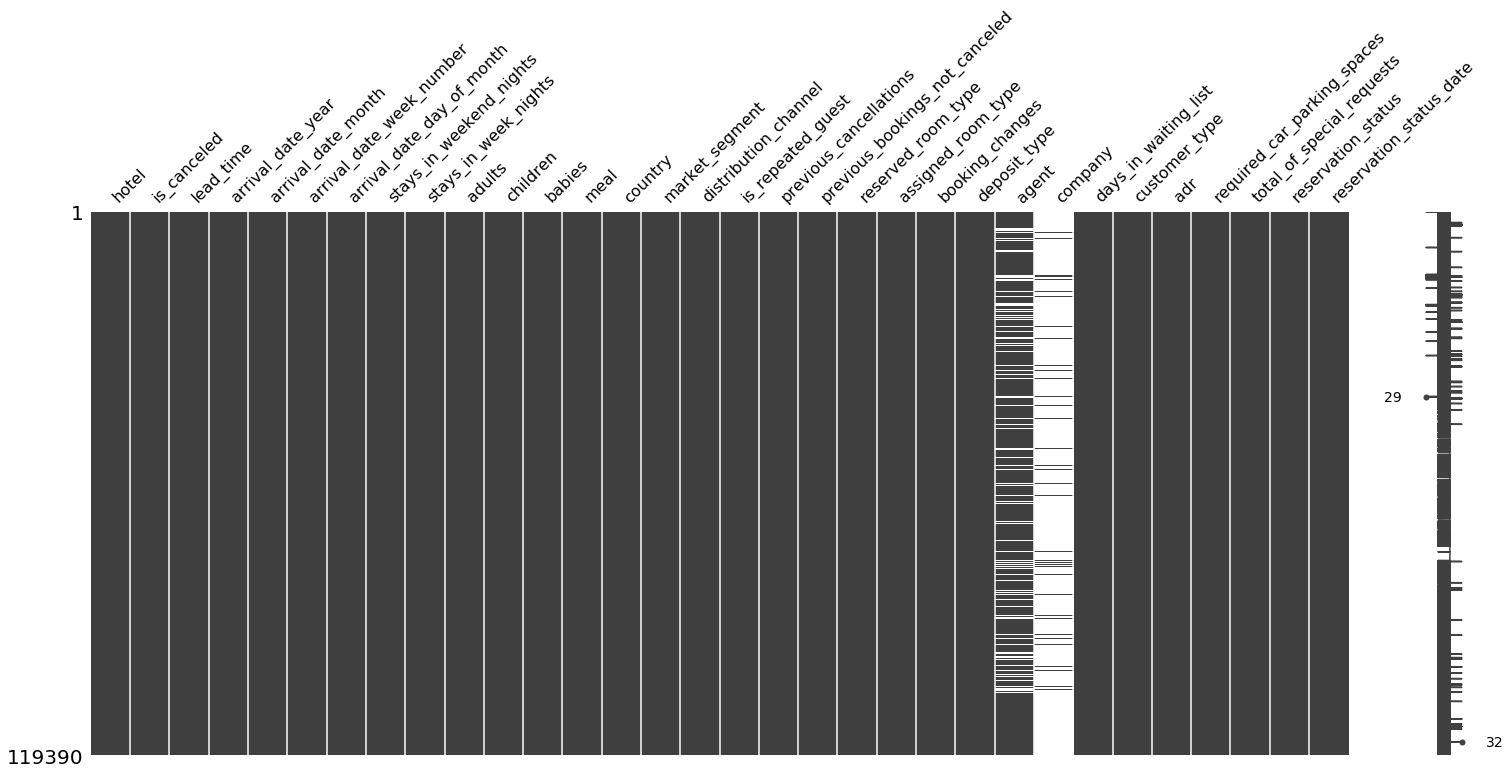

In [13]:
msno.matrix(hotels)
plt.show()

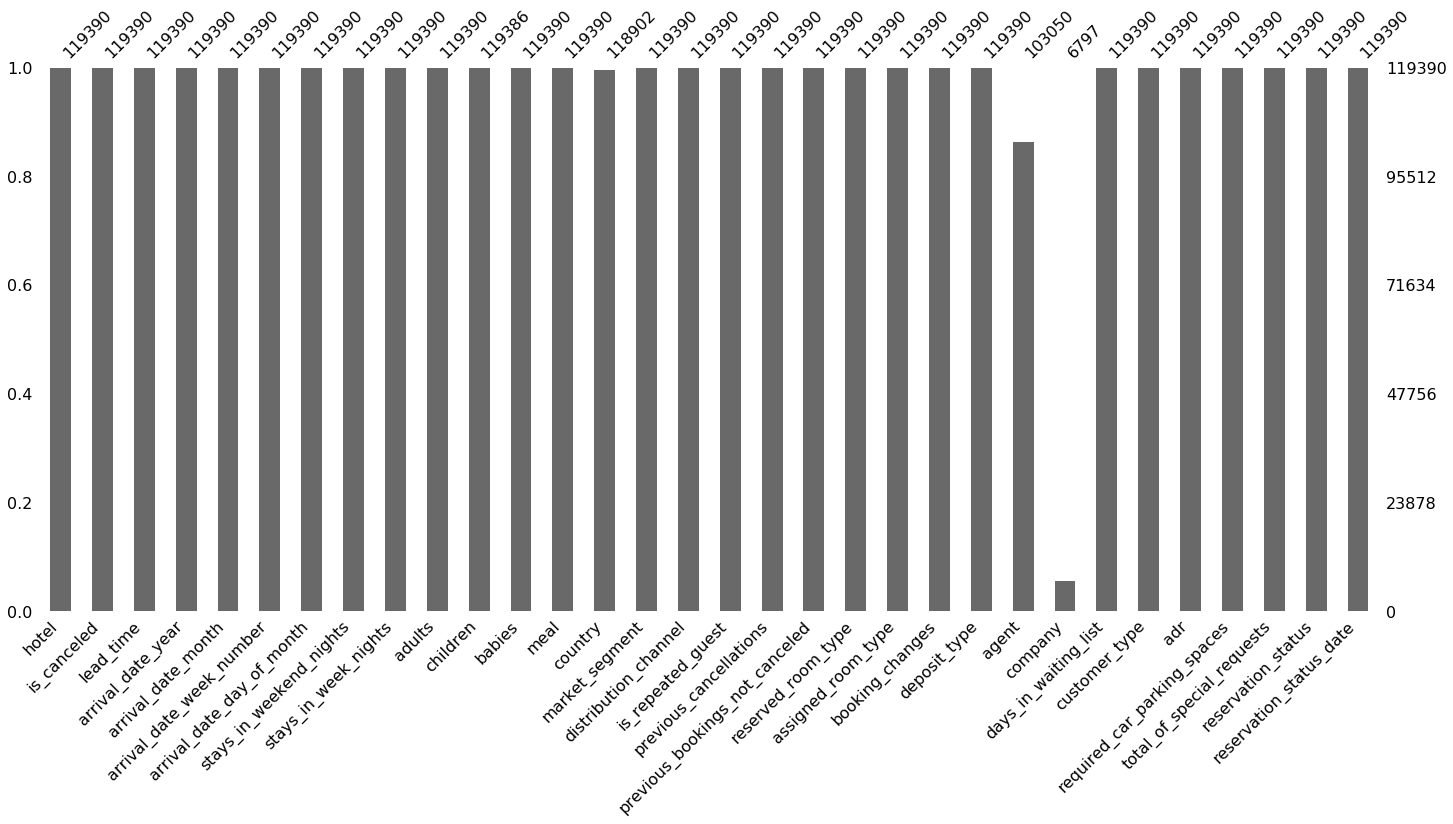

In [14]:
msno.bar(hotels)
plt.show()

these missingno plots help us visualize our missing data and get a better understanding of it,
and it's very useful for detecting any relationship between the missing data in the columns

#### . Drop rows having missing values except for variables like Agent or Company, “NULL” is presented as one of the categories

In [15]:
hotels.dropna(subset=['country', 'children'], inplace=True,axis='rows')
hotels.reset_index(drop=True, inplace=True)

In [16]:
hotels['company'].unique()

array([ nan, 110., 113., 270., 178., 240., 154., 144., 307., 268.,  59.,
       204., 312., 318.,  94., 174., 274., 195., 223., 317., 281., 118.,
        53., 286.,  12.,  47., 324., 342., 373., 371.,  86.,  82., 218.,
        88.,  31., 397., 392., 405., 331., 367.,  20.,  83., 416.,  51.,
       395., 102.,  34.,  84., 360., 394., 382., 461., 478., 112., 486.,
       421.,   9., 308., 135., 224., 504., 269., 356., 498., 390., 513.,
       203., 263., 477., 521., 169., 515., 445., 337., 251., 428., 292.,
       388., 130., 250., 355., 254., 543., 531., 528., 120.,  81., 116.,
       530., 103.,  62.,  39.,  16.,  61.,  92., 501., 291., 290., 192.,
        43., 465., 287., 297., 207., 437., 165., 329., 272.,  28.,  77.,
       482., 200.,  42., 338., 108.,  72., 246., 319., 146., 159., 380.,
       323., 511., 407., 325., 278.,  80., 403., 399.,  14., 137., 343.,
       346., 347., 349., 289., 351., 353.,  54.,  99., 358., 361., 362.,
       366., 372., 365., 277., 109., 377., 379.,  2

In [17]:
hotels['agent'].unique()

array([ nan, 304., 240., 303.,  15., 241.,   8., 250., 115.,   5., 175.,
       134., 156., 243., 242.,   3., 105.,  40., 147., 306., 184.,  96.,
         2., 127.,  95., 146.,   9., 177.,   6., 143., 244., 149., 167.,
       300., 171., 305.,  67., 196., 152., 142., 261., 104.,  36.,  26.,
        29., 258., 110.,  71., 181.,  88., 251., 275.,  69., 248., 208.,
       256., 314., 126., 281., 273., 253., 185., 330., 334., 328., 326.,
       321., 324., 313.,  38., 155.,  68., 335., 308., 332.,  94., 348.,
       310., 339., 375.,  66., 327., 387., 298.,  91., 245., 385., 257.,
       393., 168., 405., 249., 315.,  75., 128., 307.,  11., 436.,   1.,
       201., 183., 223., 368., 336., 291., 464., 411., 481.,  10., 154.,
       468., 410., 390., 440., 495., 492., 493., 434.,  57., 531., 420.,
       483., 526., 472., 429.,  16.,  34., 252., 270.,  47., 114., 301.,
       193., 182., 135., 350., 195., 352., 355., 159., 139., 363., 384.,
       360., 331., 367.,  64.,  78., 406., 163., 41

#### 3. Change arrival year, month and day feature to datetime format called arrival_date. 

In [18]:
hotels[['arrival_date_year', 'arrival_date_month','arrival_date_day_of_month']].head()

,arrival_date_year,arrival_date_month,arrival_date_day_of_month
0,2015,July,1
1,2015,July,1
2,2015,July,1
3,2015,July,1
4,2015,July,1


In [126]:
# first we need to encode the months column to numbers
mappings = {'January': '1', 
            'February': '2',
            'March': '3',
            'April': '4',
            'May': '5',
            'June': '6',
            'July': '7',
            'August': '8',
            'September': '9',
            'October': '10',
            'November': '11',
            'December': '12'}

hotels['arrival_date_month'] = hotels['arrival_date_month'].replace(mappings)
hotels['arrival_date_month'].unique()

array([ 7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6])

In [21]:
#transforming months to int data type
hotels['arrival_date_month'] = hotels['arrival_date_month'].astype('int')

In [22]:
#pd.to_datetime(hotels[['arrival_date_year', 'arrival_date_month','arrival_date_day_of_month']],format = '%Y,%m,%d')
hotels['arrival_date']=pd.to_datetime((hotels.arrival_date_year*10000+hotels.arrival_date_month*100+hotels.arrival_date_day_of_month).apply(str),
                                      format='%Y-%m-%d')
hotels['arrival_date']

0        2015-07-01
1        2015-07-01
2        2015-07-01
3        2015-07-01
4        2015-07-01
            ...    
118893   2017-08-30
118894   2017-08-31
118895   2017-08-31
118896   2017-08-31
118897   2017-08-29
Name: arrival_date, Length: 118898, dtype: datetime64[ns]

#### 4. Verify that the timestamp of the variable reservation_status_date must occur after or at the same date as the input variable arrival_date 

In [23]:
hotels['reservation_status_date'] = pd.to_datetime(hotels['reservation_status_date'], format = '%Y-%m-%d')

In [24]:
checkout_index=(hotels['reservation_status_date'][hotels['reservation_status']=='Check-Out']).index

In [25]:
inconsistent_dates=(hotels['arrival_date'][checkout_index])>hotels['reservation_status_date'][checkout_index]
inconsistent_dates.unique()

array([False])

 we can see that there are no arrival dates after the checkout so we have nothing to change in the data set

#### 5. Propose a preprocessing to be made on this dataset. 

In [26]:
hotels.dtypes

hotel                                     object
is_canceled                                int64
lead_time                                  int64
arrival_date_year                          int64
arrival_date_month                         int32
arrival_date_week_number                   int64
arrival_date_day_of_month                  int64
stays_in_weekend_nights                    int64
stays_in_week_nights                       int64
adults                                     int64
children                                 float64
babies                                     int64
meal                                      object
country                                   object
market_segment                            object
distribution_channel                      object
is_repeated_guest                          int64
previous_cancellations                     int64
previous_bookings_not_canceled             int64
reserved_room_type                        object
assigned_room_type  

we can see that all column data types are correct, we can standarize numerical data to help the ML model algorithm

- impute NULL in agent and category columns with 0, so that we can use the column in modeling

In [28]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.NaN, strategy='constant', fill_value=0)
imputer = imputer.fit(hotels[['agent']])
hotels['agent'] = imputer.transform(hotels[['agent']])

In [29]:
imputer = SimpleImputer(missing_values=np.NaN, strategy='constant', fill_value=0)
imputer = imputer.fit(hotels[['company']])
hotels['company'] = imputer.transform(hotels[['company']])
# or we could have just used 
#hotels = hotels.fillna({'agent':0,'company':0})
# but simple imputer is way faster

- replace undefined with SC in meal column

In [31]:
hotels['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

in the description of the dataset SC is equivalent to undefined,but we can see both here, we will replace undefined with SC

In [33]:
# Replace values and collapse data
hotels['meal'] = hotels['meal'].replace({'Undefined': 'SC'})
hotels['meal'].unique()

array(['BB', 'FB', 'HB', 'SC'], dtype=object)

- distribution channel

In [34]:
d=hotels[hotels['distribution_channel']=='Undefined'].index
d

Int64Index([14185], dtype='int64')

we have one row with undefined distribution_channel, we will delete that row

In [35]:
hotels.drop(d, inplace=True)
hotels.reset_index(drop=True, inplace=True)

- we have also observed that some colums have 0 in adults, children and babies which doesn't make any sense
that's why we decided to remove those columns

In [36]:
z=hotels[hotels['adults']==0]
z=z[z['children']==0].index
hotels.drop(z,inplace=True)
hotels.reset_index(drop=True, inplace=True)

### numerical data standarization

In [37]:
print(hotels['lead_time'].max())
print(hotels['babies'].max())

737
10


 numericl data in our data set have different ranges so it is intresting to standarize our data

In [38]:
from sklearn.preprocessing import StandardScaler

columns_to_standarize=['lead_time','arrival_date_week_number','arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights','adults','children','babies',
                       'previous_cancellations','previous_bookings_not_canceled','booking_changes','days_in_waiting_list',
                       'adr','required_car_parking_spaces','total_of_special_requests']
scaled_data=hotels.copy()

scaler = StandardScaler()
scaled_columns = scaler.fit_transform(scaled_data[columns_to_standarize].values)

scaled_data[columns_to_standarize]=scaled_columns

In [39]:
scaled_data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date
0,Resort Hotel,0,2.222308,2015,7,-0.012151,-1.685701,-0.935105,-1.323873,0.241778,...,0.0,0.0,-0.132175,Transient,-2.026874,-0.253493,-0.721263,Check-Out,2015-07-01,2015-07-01
1,Resort Hotel,0,5.916822,2015,7,-0.012151,-1.685701,-0.935105,-1.323873,0.241778,...,0.0,0.0,-0.132175,Transient,-2.026874,-0.253493,-0.721263,Check-Out,2015-07-01,2015-07-01
2,Resort Hotel,0,-0.911014,2015,7,-0.012151,-1.685701,-0.935105,-0.794518,-1.498269,...,0.0,0.0,-0.132175,Transient,-0.538471,-0.253493,-0.721263,Check-Out,2015-07-02,2015-07-01
3,Resort Hotel,0,-0.854895,2015,7,-0.012151,-1.685701,-0.935105,-0.794518,-1.498269,...,304.0,0.0,-0.132175,Transient,-0.538471,-0.253493,-0.721263,Check-Out,2015-07-02,2015-07-01
4,Resort Hotel,0,-0.845542,2015,7,-0.012151,-1.685701,-0.935105,-0.265162,0.241778,...,240.0,0.0,-0.132175,Transient,-0.082028,-0.253493,0.540203,Check-Out,2015-07-03,2015-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118722,City Hotel,0,-0.761363,2017,8,0.576674,1.617126,1.079562,1.322906,0.241778,...,394.0,0.0,-0.132175,Transient,-0.118940,-0.253493,-0.721263,Check-Out,2017-09-06,2017-08-30
118723,City Hotel,0,-0.022460,2017,8,0.576674,1.731017,1.079562,1.322906,1.981825,...,9.0,0.0,-0.132175,Transient,2.446867,-0.253493,1.801669,Check-Out,2017-09-07,2017-08-31
118724,City Hotel,0,-0.658478,2017,8,0.576674,1.731017,1.079562,1.322906,0.241778,...,9.0,0.0,-0.132175,Transient,1.102939,-0.253493,4.324600,Check-Out,2017-09-07,2017-08-31
118725,City Hotel,0,0.043012,2017,8,0.576674,1.731017,1.079562,1.322906,0.241778,...,89.0,0.0,-0.132175,Transient,0.044982,-0.253493,-0.721263,Check-Out,2017-09-07,2017-08-31


### categorical variables encoding

 label encoding is straight but it has the disadvantage that the numeric values can be misinterpreted
 by algorithms as having some sort of hierarchy/order in them, but if we chose  one hot encoder
 we will end up with over 200 columns wich is very expensive in terms of computing.
 that's why we will experiment with label encoding first and see how the satisfying the results are.

In [40]:
hotels['country'].unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'ETH', 

In [41]:
from sklearn.preprocessing import LabelEncoder
columns_to_label=['hotel','meal','country','market_segment','distribution_channel','reserved_room_type','assigned_room_type',
                   'deposit_type','customer_type','reservation_status']

In [42]:
labelencoder = LabelEncoder()
for column_to_label in columns_to_label:
    scaled_data[column_to_label] = labelencoder.fit_transform(scaled_data[column_to_label])
    

In [43]:
scaled_data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date
0,1,0,2.222308,2015,7,-0.012151,-1.685701,-0.935105,-1.323873,0.241778,...,0.0,0.0,-0.132175,2,-2.026874,-0.253493,-0.721263,1,2015-07-01,2015-07-01
1,1,0,5.916822,2015,7,-0.012151,-1.685701,-0.935105,-1.323873,0.241778,...,0.0,0.0,-0.132175,2,-2.026874,-0.253493,-0.721263,1,2015-07-01,2015-07-01
2,1,0,-0.911014,2015,7,-0.012151,-1.685701,-0.935105,-0.794518,-1.498269,...,0.0,0.0,-0.132175,2,-0.538471,-0.253493,-0.721263,1,2015-07-02,2015-07-01
3,1,0,-0.854895,2015,7,-0.012151,-1.685701,-0.935105,-0.794518,-1.498269,...,304.0,0.0,-0.132175,2,-0.538471,-0.253493,-0.721263,1,2015-07-02,2015-07-01
4,1,0,-0.845542,2015,7,-0.012151,-1.685701,-0.935105,-0.265162,0.241778,...,240.0,0.0,-0.132175,2,-0.082028,-0.253493,0.540203,1,2015-07-03,2015-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118722,0,0,-0.761363,2017,8,0.576674,1.617126,1.079562,1.322906,0.241778,...,394.0,0.0,-0.132175,2,-0.118940,-0.253493,-0.721263,1,2017-09-06,2017-08-30
118723,0,0,-0.022460,2017,8,0.576674,1.731017,1.079562,1.322906,1.981825,...,9.0,0.0,-0.132175,2,2.446867,-0.253493,1.801669,1,2017-09-07,2017-08-31
118724,0,0,-0.658478,2017,8,0.576674,1.731017,1.079562,1.322906,0.241778,...,9.0,0.0,-0.132175,2,1.102939,-0.253493,4.324600,1,2017-09-07,2017-08-31
118725,0,0,0.043012,2017,8,0.576674,1.731017,1.079562,1.322906,0.241778,...,89.0,0.0,-0.132175,2,0.044982,-0.253493,-0.721263,1,2017-09-07,2017-08-31


<div id="III. Exploratory data analysis">
    <h2>III. Exploratory data analysis: </h2> 
</div>

##### 1. Create dataset summary statistics – Date variables. 

In [44]:
hotels.describe(datetime_is_numeric=True)['arrival_date']

count                           118727
mean     2016-08-29 01:58:07.991779328
min                2015-07-01 00:00:00
25%                2016-03-14 00:00:00
50%                2016-09-06 00:00:00
75%                2017-03-19 00:00:00
max                2017-08-31 00:00:00
std                                NaN
Name: arrival_date, dtype: object

In [45]:
hotels.describe(datetime_is_numeric=True)['reservation_status_date']

count                           118727
mean     2016-07-30 05:56:02.217524224
min                2014-10-17 00:00:00
25%                2016-02-02 00:00:00
50%                2016-08-07 00:00:00
75%                2017-02-09 00:00:00
max                2017-09-14 00:00:00
std                                NaN
Name: reservation_status_date, dtype: object

##### 2.Create dataset summary statistics – Categorical variables. 

In [46]:
hotels.describe(include=['object'])

,hotel,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,118727,118727,118727,118727,118727,118727,118727,118727,118727,118727
unique,2,4,177,7,4,9,11,3,4,3
top,City Hotel,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79143,91789,48478,56333,97612,85479,73829,103992,89045,74589


##### 3. Create dataset summary statistics – Integer and numeric variables

In [47]:
hotels.describe(include=['int64','float64'])

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118727.000000,118727.000000,118727.000000,118727.000000,118727.000000,118727.000000,118727.000000,118727.000000,118727.000000,118727.000000,118727.000000,118727.000000,118727.000000,118727.000000,118727.000000,118727.000000,118727.000000,118727.000000,118727.000000,118727.000000
mean,0.371760,104.401324,2016.157605,27.165093,15.801056,0.928298,2.500914,1.861051,0.104349,0.007959,0.031593,0.087208,0.131613,0.218830,74.951696,10.546944,2.330658,102.133353,0.061907,0.571765
std,0.483277,106.915734,0.707451,13.586419,8.780393,0.992724,1.889096,0.574699,0.399432,0.097450,0.174916,0.846423,1.485306,0.638916,107.170694,53.462682,17.633138,50.389804,0.244216,0.792732
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,70.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,153.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,40.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,18.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


##### 4. Check the distribution of hotel type for cancellation 

In [48]:
hotels.groupby('hotel').mean()['is_canceled']

hotel
City Hotel      0.417738
Resort Hotel    0.279835
Name: is_canceled, dtype: float64

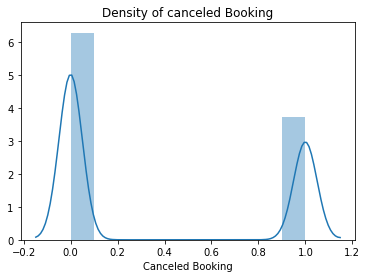

In [49]:
sns.distplot(hotels['is_canceled'], bins = 10)
plt.title("Density of canceled Booking")
plt.xlabel('Canceled Booking')
plt.show()

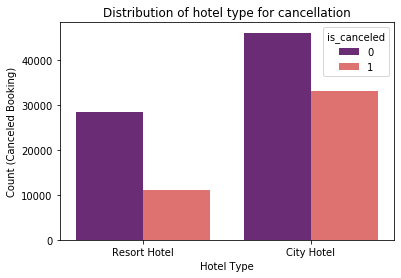

In [50]:
sns.countplot(x = 'hotel', hue = 'is_canceled', data = hotels, palette = 'magma')
plt.title('Distribution of hotel type for cancellation')
plt.xlabel('Hotel Type')
plt.ylabel('Count (Canceled Booking)')
plt.show()


This representation show the distribution of hotel type for cancellation.
there is more resevation at cities Hotels than at Resort ones.

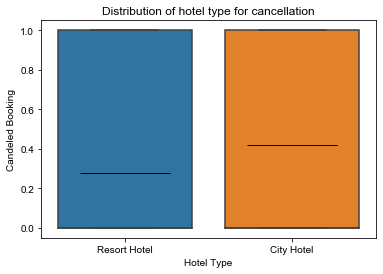

In [51]:
sns.boxplot(x = 'hotel', y = 'is_canceled', data = hotels,showmeans=True,meanprops={"marker":"_",
                       "markeredgecolor":"black",
                      "markersize":"90"})
sns.set(rc={'figure.figsize':(10,10)})
plt.title('Distribution of hotel type for cancellation')
plt.xlabel('Hotel Type')
plt.ylabel('Candeled Booking')
plt.show()

This representation show that there is more canceled booking for the resorts Hotels than it is for the Cities ones.

- 72% Canceled and 28% not for Resort Hotels
- 59% Canceled and 41% not for City Hotels

##### 5. Plot distribution of cancellation and Number of Adults

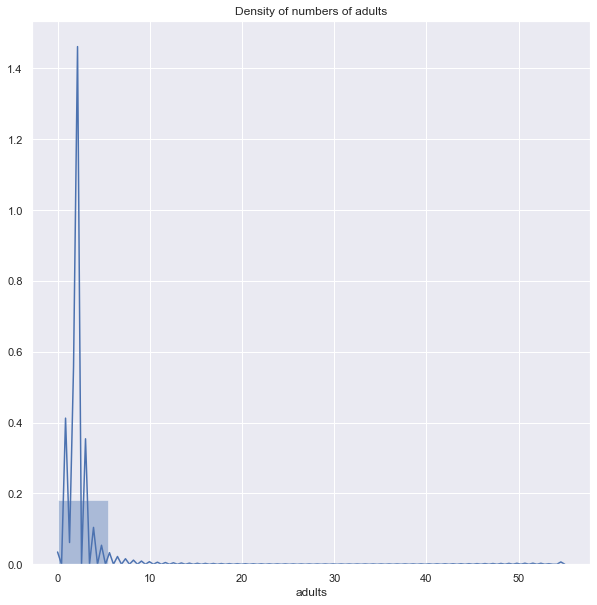

In [52]:
sns.distplot(hotels['adults'], bins = 10)
plt.title("Density of numbers of adults")
plt.show()

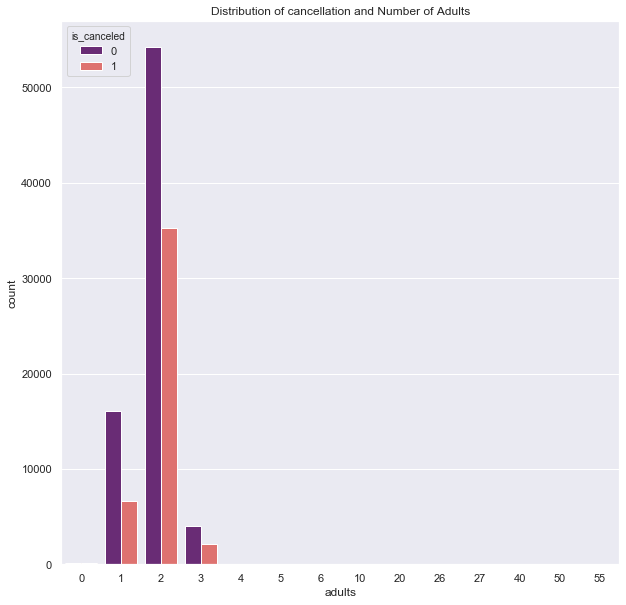

In [53]:
sns.countplot(x = 'adults', hue = 'is_canceled', data = hotels, palette = 'magma')
plt.title("Distribution of cancellation and Number of Adults")
plt.show()

##### 6. Taking in consideration the characteristics of the variables included in this dataset propose two possible modeling this dataset can have an important role for research and education in revenue management (i.e define two possible target variables and the purpose of each analysis) 

In [54]:
hotels['meal'].unique()

array(['BB', 'FB', 'HB', 'SC'], dtype=object)

we can consider the target variable meal and see what the futur customers are more likely to order, this is very
 important in the hotel industry as meal preparation takes a lot of time and money, and by predicting how much and when to 
 cook food, that could save tons of money and time for the hotel restaurent 

In [55]:
hotels['is_repeated_guest'].unique()

array([0, 1], dtype=int64)

the target variable 'is_repeated_guest' looks very intresting, when a new customer visits the hotel and is about to leave
(so that the data is gathered) we can predict if he is coming back or not, if he's got a good chance in stopping by one more time
the hotel marketing team can make special offers for those kind of customers, like: coupon reduction for their next visit,
or give them a souvenir to leave a good impression...
this target variable can play huge in the marketing strategy of the hotel, and can readily generate a lot of cash    

### IV. Modeling

based on the type of our data mining problem (binary classification) and the size of our dataset we have chosed 2
classification algorithms to fit, test and score on our hotels data,to be able to chose the best one

In [56]:
scaled_data.columns.values

array(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'arrival_date'],
      dtype=object)

In [57]:
features=np.delete(scaled_data.columns, (1,3,4,5,6,20,30,31,32))
features

Index(['hotel', 'lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights',
       'adults', 'children', 'babies', 'meal', 'country', 'market_segment',
       'distribution_channel', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'booking_changes', 'deposit_type', 'agent', 'company',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests'],
      dtype='object')

- we have deleted some features that couldn't make sense, like arrival date: if he arrives we don't have to know if he cancels.
assigned room: he will be assigned a room when he arrives so it doesn't make sense to leave it.
reservation statues and resevation statues date

In [58]:
target=scaled_data.columns[1]
target

'is_canceled'

In [59]:
X = scaled_data[features].values
y=scaled_data[target].values

In [121]:
# we split our data into train and test
from sklearn.model_selection import train_test_split
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, random_state=42)
print(X_trainset.shape, X_testset.shape, y_trainset.shape, y_testset.shape)

(89045, 24) (29682, 24) (89045,) (29682,)


we import the needed algorithms that we decided to use

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

- we have chosed logistic regression because it works so well in binary classification and with sizes of data such as the one we have

- we have seen in the class the decision tree model, we decided to take it a step forward and work with a more performant and 
sophesticated algorithm called: random forrest classifier.
The random forest combines hundreds or thousands of decision trees,
trains each one on a slightly different set of the observations,
splitting nodes in each tree considering a limited number of the features.
The final predictions of the random forest are made by averaging the predictions of each individual tree.

In [62]:
models={"LogisticRegression":LogisticRegression(random_state=42,max_iter=4000),
       "RandomForestClassifier":RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')
       }

results={}

we put our models in our dictionnary to speed up our coding using some for loops

we chosed some hyperparameters that we judged are good for our problem,later on we will do some hyper parameter tuning to make sure
that we're making the right choices

In [63]:
for model_name, model in models.items():
    model.fit(X_trainset, y_trainset)
    results[model_name]=model.score(X_testset, y_testset)

training of both our models, and storing the score values in the results dictionnary

In [64]:
results

{'LogisticRegression': 0.792972171686544,
 'RandomForestClassifier': 0.8853513914156728}

we can see that both the algorithmes did a pretty good job, still the RandomForestClassifier is way better with over 88.5% correct answers

In [65]:
results_df=pd.DataFrame(data=results.values(),index=results.keys())

results_df['accuracy']=results_df[0]
results_df.drop([0],axis=1)

,accuracy
LogisticRegression,0.792972
RandomForestClassifier,0.885351


# Hyperparameter Tuning 

Often times, we don't immediately know what the optimal model architecture should be for a given model, and thus we'd like to be able to explore a range of possibilities. We'll ideally ask the machine to perform this exploration and select the optimal model architecture automatically. Parameters which define the model architecture are referred to as hyperparameters and thus this process of searching for the ideal model architecture is referred to as hyperparameter tuning.

##### hyperparameter tuning for logistic regression

In [66]:
from sklearn.model_selection import RandomizedSearchCV

we will use RandomizedSearchCV to find the best hyperparameters for our logistic regression model

In [67]:
log_reg_grid={"C": np.logspace(-4,4,20),
             "solver": ["liblinear"]}

In [68]:
rs_log_reg=RandomizedSearchCV(estimator=models["LogisticRegression"], 
                              param_distributions=log_reg_grid,
                              cv=5,
                              n_iter=5,
                              verbose=0)

In [69]:
best_model = rs_log_reg.fit(X_trainset, y_trainset)
c=best_model.best_estimator_.get_params()['C']
print('Best C:', best_model.best_estimator_.get_params()['C'])
print('Best solver:', best_model.best_estimator_.get_params()['solver'])

Best C: 78.47599703514607
Best solver: liblinear


In [192]:
best_model.score(X_testset, y_testset)

0.7954920100925147

the new model with the new hyperparameters is doing better than the old onen in terms of scoring he's doing approximatlly 0.002 better

##### hyperparameter tuning for random forrest classifier

a hyperparameter is a parameter of the model that is set prior to the start of the learning process. Different models have different hyperparameters that can be set. For a Random Forest Classifier, there are several different hyperparameters that can be adjusted

In [70]:
from sklearn.model_selection import GridSearchCV

we will use GridSearchCV to find the best hyperparameters for our RandomForestClassifier model

In [71]:
n_estimators = [100, 300, 500]
max_depth = [ 15, 25, 30]
min_samples_split = [2, 5, 10, 15]
min_samples_leaf = [1, 2, 5] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(RandomForestClassifier(), hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(X_trainset, y_trainset)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


1.n_estimators: The n_estimators parameter specifies the number of trees in the forest of the model. The default value for this parameter is 10, which means that 10 different decision trees will be constructed in the random forest.
2. max_depth: The max_depth parameter specifies the maximum depth of each tree. The default value for max_depth is None, which means that each tree will expand until every leaf is pure. A pure leaf is one where all of the data on the leaf comes from the same class.
3. min_samples_split: The min_samples_split parameter specifies the minimum number of samples required to split an internal leaf node. The default value for this parameter is 2, which means that an internal node must have at least two samples before it can be split to have a more specific classification.
4. min_samples_leaf: The min_samples_leaf parameter specifies the minimum number of samples required to be at a leaf node. The default value for this parameter is 1, which means that every leaf must have at least 1 sample that it classifies.

In [90]:
gridF.best_params_

{'max_depth': 30,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

In [122]:
bestF.score(X_testset, y_testset)

0.9610538373424972

the new random forrest classifier is doing extremly well with over 96.1% in accuracy scoring,
that is a great exemple of showing the importance of hyperparameter tuning

<div id="VI. Model evaluation">
    <h2>VI. Model evaluation</h2> 
</div>

untill now, we have only used the score() function to evaluate our models, but when dealing with classification
it's better to use some other metrics to get better insights

- Confusion matrix - Compares the predicted values with the true values in a tabular way, if 100% correct, all values in the matrix will be top left to bottom right (diagnol line).
- Cross-validation - Splits your dataset into multiple parts and train and tests your model on each part and evaluates performance as an average.
- Precision - Proportion of true positives over total number of samples. Higher precision leads to less false positives.
- Recall - Proportion of true positives over total number of true positives and false positives. Higher recall leads to less false negatives. 
- F1 score - Combines precision and recall into one metric. 1 is best, 0 is worst. 
- Classification report - Sklearn has a built-in function called classification_report() which returns some of the main classification metrics such as precision, recall and f1-score. 
- ROC Curve - Receiver Operating Characterisitc is a plot of true positive rate versus false positive rate. 
- Area Under Curve (AUC) - The area underneath the ROC curve. A perfect model achieves a score of 1.0. 

In [74]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import plot_roc_curve

now we will use our best hyperparameters to create new models

In [91]:
clf=LogisticRegression(C=c,solver='liblinear')
forrest=RandomForestClassifier(max_depth = 30, 
                               n_estimators = 300,
                               min_samples_split = 2,
                               min_samples_leaf = 1)

In [92]:
clf.fit(X_trainset, y_trainset)
forrest.fit(X_trainset, y_trainset)

RandomForestClassifier(max_depth=30, n_estimators=300)

In [93]:
y_preds_regression=clf.predict(X_testset)
y_preds_rfc=forrest.predict(X_testset)

#### confusion matrix 

In [94]:
# confusion matrix for the regression model
conf_mat_regression=confusion_matrix(y_testset, y_preds_regression)
conf_mat_regression

array([[17266,  1413],
       [ 4728,  6275]], dtype=int64)

In [95]:
#confusion matrix for the random forrest classifier model
conf_mat_rfc=confusion_matrix(y_testset, y_preds_rfc)
conf_mat_rfc

array([[17403,  1276],
       [ 2066,  8937]], dtype=int64)

- confusion matrices plotting and visualisation

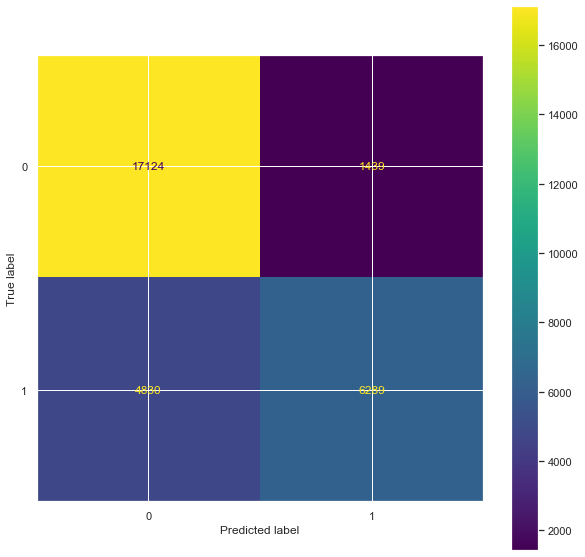

In [123]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf,X_testset, y_testset)
plt.show()

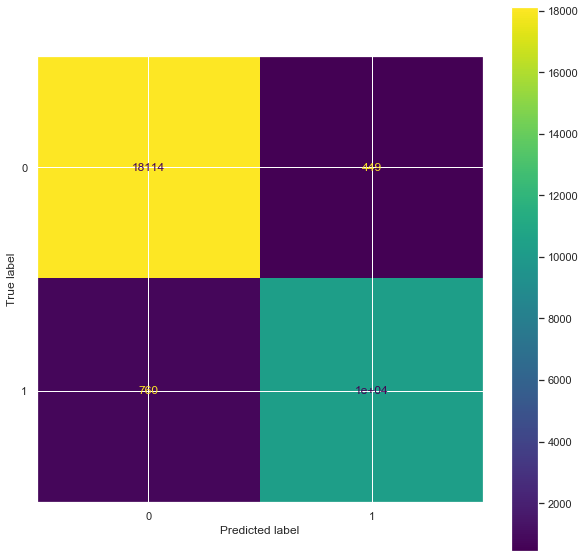

In [125]:
plot_confusion_matrix(forrest,X_testset, y_testset)
plt.show()

both of the algorithms did a better job predicting if the reservation was not going to be canceled '0', than if it will be canceled.(the number of true positives is higher than the number f true negatives)
which is good because the hotels will rarely have to deal with problems with customers, 
this way the hotels will  earn more money without risking their reputation

##### classification report

classification_report() is an sklearn built-in function which returns some of the main classification metrics such as precision, recall and f1-score. 

In [115]:
cr_regression=classification_report(y_testset, y_preds_regression)
print('classification report for regression')
print(cr_regression)

classification report for regression
              precision    recall  f1-score   support

           0       0.79      0.92      0.85     18679
           1       0.82      0.57      0.67     11003

    accuracy                           0.79     29682
   macro avg       0.80      0.75      0.76     29682
weighted avg       0.80      0.79      0.78     29682



In [114]:
cr_rfc=classification_report(y_testset, y_preds_rfc)
print('classification report for random forrest classifier')
print(cr_rfc)

classification report for random forrest classifier
              precision    recall  f1-score   support

           0       0.89      0.93      0.91     18679
           1       0.88      0.81      0.84     11003

    accuracy                           0.89     29682
   macro avg       0.88      0.87      0.88     29682
weighted avg       0.89      0.89      0.89     29682



clearly the random forrest classifier takes the lead here and is better performing according to all metrics

#####  plotting a ROC CURVE using plot_roc_curve

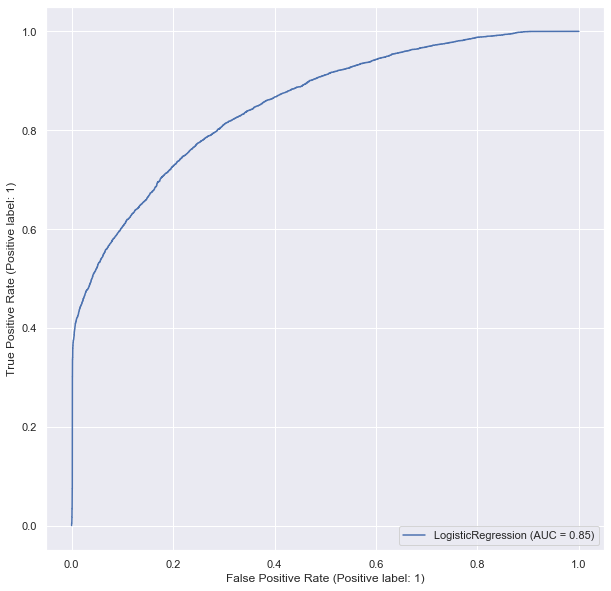

In [105]:
# plot_roc_curve for regression model
plot_roc_curve(clf, X_testset, y_testset)  
plt.show()

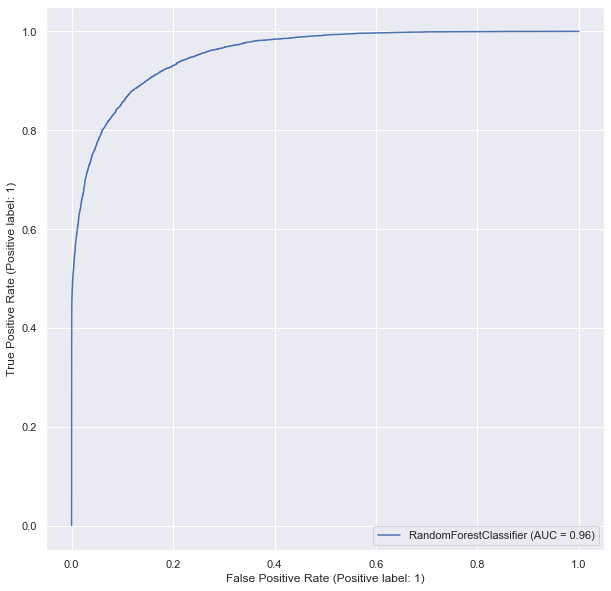

In [106]:
# plot_roc_curve for random forrest classifier model
plot_roc_curve(forrest, X_testset, y_testset)  
plt.show()

the area under roc curve confirms our evaluation of the models, at any threshhold the true positives of the random forrest classifier are higher than the true positives of the logistic regression classifier 

so far we have evaluated our model with only one traning set and one testing set, a more sophisticated way of doing
the evaluation is by using the cross validation

In [107]:
# importing cross_val_score from sklearn
from sklearn.model_selection import cross_val_score

In [108]:
#cross val scoring the regression model
cross_val_score(clf, X, y,scoring="accuracy",cv=5)

array([0.68352565, 0.71877369, 0.78159613, 0.76218151, 0.8068646 ])

In [109]:
cross_val_acc1=np.mean(cross_val_score(clf, X, y,scoring="accuracy",cv=5))
cross_val_acc1

0.7505883150192914

In [110]:
#cross val scorinf the random forrest classifier model
cross_val_score(forrest, X, y,scoring="accuracy",cv=5)

array([0.6932536 , 0.75557989, 0.75556959, 0.80374816, 0.77810065])

In [111]:
cross_val_acc2=np.mean(cross_val_score(forrest, X, y,scoring="accuracy",cv=5))
cross_val_acc2

0.756938751502464

taking the mean of the returned values from cross_val_score, we are going to give a cross validates version of
the scoring metrics we have used above


In [116]:
from sklearn.metrics import make_scorer

- for the regression model:

In [117]:
ps_regression=np.mean(cross_val_score(clf,X,y, scoring = make_scorer(precision_score), cv = 5 ))
rs_regression=np.mean(cross_val_score(clf,X,y, scoring = make_scorer(recall_score), cv = 5 ))
f1_regression=np.mean(cross_val_score(clf,X,y, scoring = make_scorer(f1_score), cv = 5 ))

- for the random forrest classifier  model:

In [127]:
ps_rfc=np.mean(cross_val_score(forrest,X,y, scoring = make_scorer(precision_score), cv = 5 ))
rs_rfc=np.mean(cross_val_score(forrest,X,y, scoring = make_scorer(recall_score), cv = 5 ))
f1_rfc=np.mean(cross_val_score(forrest,X,y, scoring = make_scorer(f1_score), cv = 5 ))


In [132]:
##### visualising our cross_val scoring in a dataframe
results_cross_val_score=pd.DataFrame(data=[[ps_regression,rs_regression,f1_regression],[ps_rfc,rs_rfc,f1_rfc]],
                                     columns=['precision_score','recall_score','f1_score'])

results_cross_val_score


,precision_score,recall_score,f1_score
0,0.758156,0.520800,0.582065
1,0.740992,0.589927,0.618324


as we shuffle our training and testing data the results remain the same: the random forrest classifier takes the lead and we will be using it for future predictions

##### exporting our models:

exporting the regression model to 'LogisticRegressionFile.joblib' and exporting the random forrest classifier model to 'RandomForrestClassifier.joblib'

In [ ]:
from joblib import dump
# exporting the regression model
dump(clf, 'LogisticRegressionFile.joblib')
# exporting the random forrest classifier model
dump(forrest, 'RandomForrestClassifier.joblib')